# Steven Smiley's Kaggle Competition for the Titanic Dataset Notebook:
* ## Data Cleaning, Data Exploring, Feature Extraction
* ## Machine Learning, Supervised 
* ### PCA, Random Forest, Neural Networks, Logistic Regression, Support Vector Machine, Gradient Boosting, eXtreme Gradient Boosting
    """
    Created on Fri Dec 27 20:58:05 2019

    @author: stevensmiley

    Kaggle Competition Project Description: 

       This code by Steven Smiley is for
       evaluating the "Titanic: Machine Learning from Disaster" dataset from Kaggle.

       Two datasets were given for the competition:
       1) test.csv
       2) train.csv

       The "train.csv" dataset is used to create a model 
       to predict Survival Rate with the "test.csv" dataset.

# Table of Contents (TOC)

*     Code Objective 1:  Import Libraries
*     Code Objective 2:  Hide Future Warnings
*     Code Objective 3:  Get Current Directory
*     Code Objective 4:  Import Data and View Data
*     Code Objective 5:  Explore Data, Clean Data, Feature Extraction
                      5.0:  Explore Data
                         5.0.0: Explore Data:  Copy Data
                         5.0.1: Explore Data:  Find Missing Values
                         5.0.2: Explore Data: Fix Missing Values
                             5.0.2.1: Explore Data: Fix Missing Values: Age
                             5.0.2.2: Explore Data: Fix Missing Values: Cabin
                             5.0.2.3: Explore Data: Fix Missing Values: Embarked
                             5.0.2.4: Explore Data: Fix Missing Values: Fare
                             5.0.2.5: Explore Data: Verify No Missing Values: Fare
                      5.1:  Data Cleaning:
                         5.1.0:  Data Cleaning:  Change Name to Prefix
                         5.1.1:  Data Cleaning: Convert Categorical Variables to Continuous
                             5.1.1.1: Data Cleaning: Convert Categorical Variables to Continuous: Embarked, Sex, Name
                            5.1.2.1: Data Cleaning: Convert Categorical Variables to Continuous: Ticket
                        5.2.0:  Data Cleaning:  Drop:  PassengerId, Embarked, Parch, SibSp
                        5.3.0:  Feature Extraction:  Principal Component Analysis: PC1_zscore, PC2_zscore, PC1, PC2
*     Code Objective 6:  Machine Learning
                     6.0:  Machine Learning: training data split
                     6.1:  Machine Learning: Models           
                        6.1.1:  Machine Learning: Models: Logistic Regression Model
                        6.1.2:  Machine Learning: Models: SVM Model
                        6.1.3:  Machine Learning: Models: MLP Model
                        6.1.4:  Machine Learning: Models: RF Model
                        6.1.5:  Machine Learning: Models: GB Model
                        6.1.6:  Machine Learning: Models: XGB Model
                     6.2:  Machine Learning: Evaluate Models
                     6.3:  Machine Learning: Predict with Best Model
*     Code Objective 7: Export Results for Kaggle Competition 
                        

"""

# Code Objective 1:  Import Libraries

In [1]:
import warnings
import os # Get Current Directory
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd # data processing, CSV file I/O (e.i. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from scipy import stats

# Code Objective 2.0:  Hide Warnings

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('mode.chained_assignment', None)

# Code Objective 3.0: Get Current Directory 

In [3]:
currentDirectory=os.getcwd()

# Code Objective 4.0 Import Data and View Data

In [4]:
train= pd.read_csv('/kaggle/input/titanic/train.csv')
#train=os.path.join(currentDirectory,'train.csv')
#train= pd.read_csv(train)
train.head(10) #notice Survival is provided for train dataset
test=pd.read_csv('/kaggle/input/titanic/test.csv')
#test=os.path.join(currentDirectory,'test.csv')
#test=pd.read_csv(test)
test.head(10) #notice Survival is NOT provided for test dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Code Objective 5 Explore Data, Clean Data, Feature Extraction
##   5.0 Explore Data
###   5.0.0 Explore Data:  Copy Data

In [5]:
test_clean=test
train_clean=train

###   5.0.1 Explore Data: Find Missing Values

In [6]:
missing_train=train_clean.isnull().sum() # notice Age [177], Cabin [687], Embarked [2]
missing_test=test_clean.isnull().sum() # notice Age [86], Fare [1], Cabin [327]



### missing_train
   Shows the missing values in the training set

In [7]:
print(missing_train)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### missing_test
   Shows the missing values in the test set

In [8]:
print(missing_test)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


###   5.0.2 Explore Data: Fix Missing Values
####       5.0.2.1 Explore Data: Fix Missing Values: Age
Missing 177 values in train set of 891, and 86 values in test set of 418.  Therefore, missing significant portion of the data.  Fill missing values with the average value to prevent bias.


In [9]:
train_clean['Age'].fillna(train_clean['Age'].mean(),inplace=True) 
test_clean['Age'].fillna(test_clean['Age'].mean(),inplace=True) 

####      5.0.2.2 Explore Data: Fix Missing Values: Cabin

In [10]:
train_clean['Cabin']=np.where(train_clean['Cabin'].isnull(),0,1)
test_clean['Cabin']=np.where(test_clean['Cabin'].isnull(),0,1)



Verify missing cabin correlates with survival using point plot.  The point plot represents the estimate of central tendency for a numeric variable (Cabin) by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars. 
        


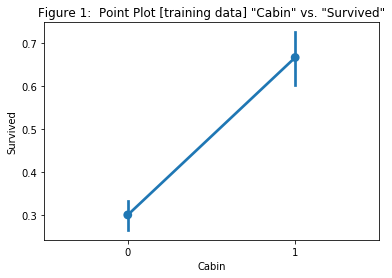

In [11]:
plt.figure()
sns.pointplot(x='Cabin',y='Survived',data=train_clean)
plt.title('Figure 1:  Point Plot [training data] "Cabin" vs. "Survived"')
plt.savefig('Figure1.png',dpi=300,bbox_inches='tight')
plt.show()

####       5.0.2.3 Explore Data: Fix Missing Values: Embarked

Missing 2 values in train set of 891, and 0 values in test set of 418.  Therefore, not missing too much information, so we can delete these rows.


In [12]:
train_clean=train_clean.dropna(subset=['Embarked'],axis=0)

####       5.0.2.4 Explore Data: Fix Missing Values: Fare

Missing 0 values in train set of 891, and 1 values in test set of 418.  Therefore, not missing too much information, but it is in the test data. This person did not have a cabin, so the fare is probably cheaper than just the average.  So we can use the average of the fare for peopel without a cabin for this value without causing bias.


In [13]:
mean_Fare=test_clean['Fare'].mean()
mean_Fare_noCabin=test_clean.loc[test_clean.loc[:,'Cabin']<1,'Fare'].mean()
test_clean['Fare'].fillna(mean_Fare_noCabin,inplace=True) 

####       5.0.2.5 Explore Data: Verify No Missing Values: Fare

In [14]:
missing_train_clean=train_clean.isnull().sum() # notice Age [177], Cabin [687], Embarked [2]
missing_test_clean=test_clean.isnull().sum() # notice Age [86], Fare [1], Cabin [327]

### missing_train_clean
   Verify there is no missing values in the training set

In [15]:
print(missing_train_clean)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### missing_test_clean
   Verify there is no missing values in the test set

In [16]:
print(missing_test_clean)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


##   5.1      Data Cleaning:
###   5.1.0    Data Cleaning:  Change Name to Prefix

In [17]:
def prefix_conv(data):
    prefix=[]
    for kk in list(data): # converts string in an array to only the Prefix
        prefix.append(kk[kk.index(',')+1:kk.index('.')+1])
    return prefix
train_clean['Name']=prefix_conv(train_clean['Name'])
test_clean['Name']=prefix_conv(test_clean['Name'])
# View Unique Names
Unique_Names_Train=(list(set(train_clean['Name'])))
Unique_Names_Test=(list(set(train_clean['Name'])))

## Before Numeric Conversion
#### Unique_Names_Train

In [18]:
print(Unique_Names_Train)

[' Miss.', ' Dr.', ' Lady.', ' Mr.', ' Ms.', ' Col.', ' Sir.', ' Rev.', ' Mlle.', ' Mrs.', ' Don.', ' Master.', ' the Countess.', ' Major.', ' Capt.', ' Mme.', ' Jonkheer.']


###   5.1.1   Data Cleaning: Convert Categorical Variables to Continuous
####   5.1.1.1 Data Cleaning: Convert Categorical Variables to Continuous: Embarked, Sex, Name

In [19]:
def list_conv(data): #converts value to unique number based on index in a unique list
    list_Types=(list(set(data)))
    list_List=[]
    for jj in list(data):
        for ii in list_Types:
            if jj == ii:
                list_List.append(list_Types.index(ii))   
    return list_List
train_clean['Embarked']=list_conv(train_clean['Embarked'])
test_clean['Embarked']=list_conv(test_clean['Embarked'])
train_clean['Sex']=list_conv(train_clean['Sex'])
test_clean['Sex']=list_conv(test_clean['Sex'])
train_clean['Name']=list_conv(train_clean['Name'])
test_clean['Name']=list_conv(test_clean['Name'])

Unique_Names_Train=(list(set(train_clean['Name'])))
Unique_Names_Test=(list(set(train_clean['Name'])))

## After Numeric Conversion
#### Unique_Names_Train

In [20]:
print(Unique_Names_Train)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


####   5.1.2.1 Data Cleaning: Convert Categorical Variables to Continuous: Ticket
The Ticket appears random and is assumed to have no relationship with the Survival.  Therefore, Ticket is removed.

In [21]:
train_clean.drop(['Ticket'],axis=1,inplace=True)
test_clean.drop(['Ticket'],axis=1,inplace=True)

In [22]:
#       Remove Variables with no correlation
#       Use Heatmap
corr = train_clean.corr()
n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(0, 50, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

#### Function:  value_to_color

In [23]:

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

#### Function:  heatmap

In [24]:
def heatmap(x, y, size, color,titleh,markert,filenameh):
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
        marker=markert # Use star as scatterplot marker

    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_title(titleh)
    
    # ...
    
    # Add color legend on the right side of the plot
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot
    
    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars
    
    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right
    plt.savefig(filenameh,dpi=300,bbox_inches='tight')
    plt.show()

### Figure 2:  Heatmap [training data]

The heatmap shows how well correlated each feature is to the other features in the training set.  Before cleaning, some features don't correlate with the Survived feature that much.  For example, the PassengerId doesn't show much correlation at all to the Survived feature, which makes sense because it is the index of the passenger.  The bigger the circle or the darker the color, the higher the correlation is.

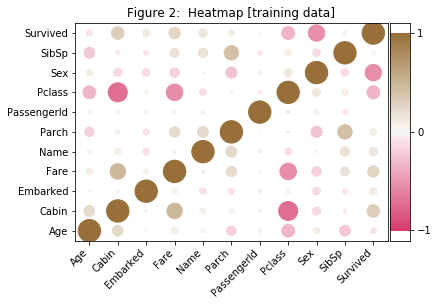

In [25]:
columns = train_clean.columns
corr = train_clean[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color=corr['value'],
    titleh='Figure 2:  Heatmap [training data]',
    markert='o',
    filenameh='Figure2.png')

###   5.2.0 Data Cleaning:  Drop:  PassengerId, Embarked, Parch, SibSp
From the heatmap,  [PassengerId, Embarked, Parch, SibSp] shows the least amount 
of correlation for survival.

In [26]:
droplist=['PassengerId','Embarked','Parch','SibSp']
train_clean.drop(droplist,axis=1,inplace=True)
test_clean.drop(droplist,axis=1,inplace=True)

###   5.3.0 Feature Extraction:  Principal Component Analysis: PC1_zscore, PC2_zscore

In [27]:
pca_z = PCA(.95) #at least 95% of variance explained
pca_z.fit(stats.zscore(pd.DataFrame(train_clean.drop(['Survived'],axis=1))))
score_train_z=pca_z.transform(stats.zscore(pd.DataFrame(train_clean.drop(['Survived'],axis=1))))
score_test_z=pca_z.transform(stats.zscore(pd.DataFrame(test_clean)))


train_clean['PC1_zscore']=score_train_z[:,0]
train_clean['PC2_zscore']=score_train_z[:,1]
test_clean['PC1_zscore']=score_test_z[:,0]
test_clean['PC2_zscore']=score_test_z[:,1]


### Figure 3:  Heatmap [training data, cleaned]

The heatmap shows how well correlated each feature is to the other features in the training set.  After cleaning, the Survived feature has a higher correlation with the other features used to train a model on it.  The bigger the circle or the darker the color, the higher the correlation is.

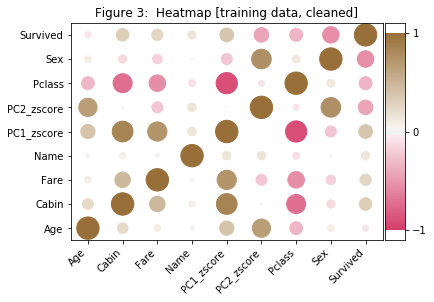

In [28]:
columns = train_clean.columns
corr = train_clean[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color=corr['value'],
    titleh='Figure 3:  Heatmap [training data, cleaned]',
    markert='o',
    filenameh='Figure3.png')


# Code Objective 6:  Machine Learning
##  6.0 Machine Learning: training data split

In [29]:
features = train_clean.drop('Survived',axis=1)
labels = train_clean['Survived']
X_train, X_val, y_train, y_val = train_test_split(features,labels, test_size=0.20, random_state=5) #hold out 20% of data
X_train = pd.DataFrame(X_train)
X_val=pd.DataFrame(X_val)
y_train = pd.DataFrame(y_train)
y_val=pd.DataFrame(y_val)
for dataset in [y_train, y_val]:
    print(round(len(dataset),2))
    
tr_features=X_train
tr_labels=y_train

val_features = X_val
val_labels=y_val

711
178


#### Function:  print_results

In [30]:
def print_results(results,name,filename_pr):
    with open(filename_pr, mode='w') as file_object:
        print(name,file=file_object)
        print(name)
        print('BEST PARAMS: {}\n'.format(results.best_params_),file=file_object)
        print('BEST PARAMS: {}\n'.format(results.best_params_))
        means = results.cv_results_['mean_test_score']
        stds = results.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, results.cv_results_['params']):
            print('{} {} (+/-{}) for {}'.format(name,round(mean, 3), round(std * 2, 3), params),file=file_object)
            print('{} {} (+/-{}) for {}'.format(name,round(mean, 3), round(std * 2, 3), params))

## 6.1 Machine Learning:          


In order to find a good model, several algorithms are tested on the training dataset.  A senstivity study using different Hyperparameters of the algorithms are iterated on with GridSearchCV in order optimize each model.  The best model is the one that has the highest accuracy without overfitting by looking at both the training data and the validation data results.  Computer time does not appear to be an issue for these models, so it has little weight on deciding between models.  

### 6.1.0 Machine Learning: Hyperparameter using GridSearch CV

In [31]:
print(GridSearchCV)

<class 'sklearn.model_selection._search.GridSearchCV'>


### GridSearch CV

class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)[source]¶

Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

### 6.1.1  Machine Learning: Models: Logistic Regression Model 

In [32]:
print(LogisticRegression())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


## Logistic Regression:  Hyperparameter used in GridSearchCV
### HP1, C:  float, optional (default=1.0)
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
##### Details
Regularization is when a penality is applied with increasing value to prevent overfitting.  The inverse of regularization strength means as the value of C goes up, the value of the regularization strength goes down and vice versa.  
##### Values chosen
'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [33]:
LR_model_dir=os.path.join(currentDirectory,'LR_model.pkl')
if os.path.exists(LR_model_dir) == False:
    lr = LogisticRegression()
    parameters = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }
    cv=GridSearchCV(lr, parameters, cv=5)
    cv.fit(tr_features,tr_labels.values.ravel())      
    print_results(cv,'Logistic Regression (LR)','LR_GridSearchCV_results.txt')
    cv.best_estimator_
    LR_model_dir=os.path.join(currentDirectory,'LR_model.pkl')
    joblib.dump(cv.best_estimator_,LR_model_dir)
else:
    print('Already have LR')

Logistic Regression (LR)
BEST PARAMS: {'C': 100}

Logistic Regression (LR) 0.703 (+/-0.105) for {'C': 0.001}
Logistic Regression (LR) 0.754 (+/-0.116) for {'C': 0.01}
Logistic Regression (LR) 0.779 (+/-0.12) for {'C': 0.1}
Logistic Regression (LR) 0.785 (+/-0.12) for {'C': 1}
Logistic Regression (LR) 0.786 (+/-0.11) for {'C': 10}
Logistic Regression (LR) 0.788 (+/-0.112) for {'C': 100}
Logistic Regression (LR) 0.788 (+/-0.112) for {'C': 1000}


### 6.1.2  Machine Learning: Models: SVM Model

In [34]:
print(SVC())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


## Support Vector Machine:  
### Hyperparameter used in GridSearchCV
#### HP1,  kernelstring, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).
###### Details
A linear kernel type is good when the data is Linearly seperable, which means it can be separated by a single Line.
A radial basis function (rbf) kernel type is an expontential function of the squared Euclidean distance between two vectors and a constant.  Since the value of RBF kernel decreases with distance and ranges between zero and one, it has a ready interpretation as a similiarity measure.  
###### Values chosen
'kernel': ['linear','rbf']

#### HP2,  C:  float, optional (default=1.0)
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
###### Details
Regularization is when a penality is applied with increasing value to prevent overfitting.  The inverse of regularization strength means as the value of C goes up, the value of the regularization strength goes down and vice versa.  
###### Values chosen
'C': [0.1, 1, 10]

In [35]:
SVM_model_dir=os.path.join(currentDirectory,'SVM_model.pkl')
if os.path.exists(SVM_model_dir) == False:
    svc = SVC()
    parameters = {
            'kernel': ['linear','rbf'],
            'C': [0.1, 1, 10]
            }
    cv=GridSearchCV(svc,parameters, cv=5)
    cv.fit(tr_features, tr_labels.values.ravel())
    print_results(cv,'Support Vector Machine (SVM)','SVM_GridSearchCV_results.txt')
    cv.best_estimator_
    SVM_model_dir=os.path.join(currentDirectory,'SVM_model.pkl')
    joblib.dump(cv.best_estimator_,SVM_model_dir)
else:
    print('Already have SVM')

Support Vector Machine (SVM)
BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

Support Vector Machine (SVM) 0.772 (+/-0.099) for {'C': 0.1, 'kernel': 'linear'}
Support Vector Machine (SVM) 0.605 (+/-0.003) for {'C': 0.1, 'kernel': 'rbf'}
Support Vector Machine (SVM) 0.772 (+/-0.099) for {'C': 1, 'kernel': 'linear'}
Support Vector Machine (SVM) 0.738 (+/-0.063) for {'C': 1, 'kernel': 'rbf'}
Support Vector Machine (SVM) 0.772 (+/-0.099) for {'C': 10, 'kernel': 'linear'}
Support Vector Machine (SVM) 0.72 (+/-0.061) for {'C': 10, 'kernel': 'rbf'}


### 6.1.3 Machine Learning: Models: MLP Model

In [36]:
print(MLPClassifier())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


## Neural Network:  
### Hyperparameter used in GridSearchCV
#### HP1, hidden_layer_sizes:  tuple, length = n_layers - 2, default (100,)
The ith element represents the number of neurons in the ith hidden layer.
###### Details
A rule of thumb is (2/3)*(# of input features) = neurons per hidden layer. 
###### Values chosen
'hidden_layer_sizes': [(10,),(50,),(100,)]

#### HP2, activation:  {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
Activation function for the hidden layer.
###### Details
* ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
* ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
* ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
* ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)   
###### Values chosen
'hidden_layer_sizes': [(10,),(50,),(100,)]

#### HP3, learning_rate:  {‘constant’, ‘invscaling’, ‘adaptive’}, default ‘constant’
Learning rate schedule for weight updates.
###### Details
* ‘constant’ is a constant learning rate given by ‘learning_rate_init’.
* ‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)
* ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.

Only used when solver='sgd'.
  
###### Values chosen
'learning_rate': ['constant','invscaling','adaptive']

In [37]:
MLP_model_dir=os.path.join(currentDirectory,'MLP_model.pkl')
if os.path.exists(MLP_model_dir) == False:
    mlp = MLPClassifier()
    parameters = {
            'hidden_layer_sizes': [(10,),(50,),(100,)],
            'activation': ['relu','tanh','logistic'],
            'learning_rate': ['constant','invscaling','adaptive']
            }
    cv=GridSearchCV(mlp, parameters, cv=5)
    cv.fit(tr_features, tr_labels.values.ravel())
    print_results(cv,'Neural Network (MLP)','MLP_GridSearchCV_results.txt')
    cv.best_estimator_
    MLP_model_dir=os.path.join(currentDirectory,'MLP_model.pkl')
    joblib.dump(cv.best_estimator_,MLP_model_dir)
else:
    print('Already have MLP')

Neural Network (MLP)
BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}

Neural Network (MLP) 0.767 (+/-0.114) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
Neural Network (MLP) 0.774 (+/-0.081) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
Neural Network (MLP) 0.761 (+/-0.092) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
Neural Network (MLP) 0.795 (+/-0.099) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
Neural Network (MLP) 0.789 (+/-0.107) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
Neural Network (MLP) 0.778 (+/-0.119) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
Neural Network (MLP) 0.775 (+/-0.107) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Neural Network (ML

### 6.1.4 Machine Learning: Models: RF Model

In [38]:
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## Random Forest:  
### Hyperparameter used in GridSearchCV
#### HP1, n_estimators:  integer, optional (default=100)
The number of trees in the forest.

Changed in version 0.22: The default value of n_estimators changed from 10 to 100 in 0.22.
###### Details
Usually 500 does the trick and the accuracy and out of bag error doesn't change much after. 
###### Values chosen
'n_estimators': [500],

#### HP2, max_depth:  integer or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
###### Details
None usually does the trick, but a few shallow trees are tested. 
###### Values chosen
'max_depth': [5,7,9, None]

In [39]:
RF_model_dir=os.path.join(currentDirectory,'RF_model.pkl')
if os.path.exists(RF_model_dir) == False:
    rf = RandomForestClassifier(oob_score=False)
    parameters = {
            'n_estimators': [500],
            'max_depth': [5,7,9, None]
            }
    cv = GridSearchCV(rf, parameters, cv=5)
    cv.fit(tr_features, tr_labels.values.ravel())
    print_results(cv,'Random Forest (RF)','RF_GridSearchCV_results.txt')
    cv.best_estimator_
    RF_model_dir=os.path.join(currentDirectory,'RF_model.pkl')
    joblib.dump(cv.best_estimator_,RF_model_dir)
else:
    print('Already have RF')

Random Forest (RF)
BEST PARAMS: {'max_depth': 7, 'n_estimators': 500}

Random Forest (RF) 0.803 (+/-0.064) for {'max_depth': 5, 'n_estimators': 500}
Random Forest (RF) 0.805 (+/-0.055) for {'max_depth': 7, 'n_estimators': 500}
Random Forest (RF) 0.803 (+/-0.078) for {'max_depth': 9, 'n_estimators': 500}
Random Forest (RF) 0.778 (+/-0.089) for {'max_depth': None, 'n_estimators': 500}


### 6.1.5 Machine Learning: Models: GB Model

In [40]:
print(GradientBoostingClassifier())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Gradient Boosting:  
### Hyperparameter used in GridSearchCV
#### HP1, n_estimators:  int (default=100)
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
###### Details
Usually 500 does the trick and the accuracy and out of bag error doesn't change much after. 
###### Values chosen
'n_estimators': [5, 50, 250, 500],

#### HP2, max_depth:  integer, optional (default=3)
maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
###### Details
A variety of shallow trees are tested. 
###### Values chosen
'max_depth': [1, 3, 5, 7, 9],

#### HP3, learning_rate:  float, optional (default=0.1)
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
###### Details
A variety was chosen because of the trade-off.
###### Values chosen
'learning_rate': [0.01, 0.1, 1]

In [41]:
GB_model_dir=os.path.join(currentDirectory,'GB_model.pkl')
if os.path.exists(GB_model_dir) == False:
    gb = GradientBoostingClassifier()
    parameters = {
            'n_estimators': [5, 50, 250, 500],
            'max_depth': [1, 3, 5, 7, 9],
            'learning_rate': [0.01, 0.1, 1]
            }
    cv=GridSearchCV(gb, parameters, cv=5)
    cv.fit(tr_features, tr_labels.values.ravel())
    print_results(cv,'Gradient Boost (GB)','GR_GridSearchCV_results.txt')
    cv.best_estimator_
    GB_model_dir=os.path.join(currentDirectory,'GB_model.pkl')
    joblib.dump(cv.best_estimator_,GB_model_dir)
else:
    print('Already have GB') 

Gradient Boost (GB)
BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}

Gradient Boost (GB) 0.605 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
Gradient Boost (GB) 0.727 (+/-0.055) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
Gradient Boost (GB) 0.786 (+/-0.09) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
Gradient Boost (GB) 0.781 (+/-0.087) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
Gradient Boost (GB) 0.605 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
Gradient Boost (GB) 0.779 (+/-0.066) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Gradient Boost (GB) 0.797 (+/-0.064) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
Gradient Boost (GB) 0.797 (+/-0.063) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Gradient Boost (GB) 0.605 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators':

### 6.1.6 Machine Learning: Models: XGB Model

In [42]:
print(XGBClassifier())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


## eXtreme Gradient Boosting:  
### Hyperparameter used in GridSearchCV
#### HP1, n_estimators:  (int) – Number of trees to fit.
###### Details
Usually 500 does the trick and the accuracy and out of bag error doesn't change much after. 
###### Values chosen
'n_estimators': [5, 50, 250, 500],

#### HP2, max_depth:  (int) – 
Maximum tree depth for base learners.
###### Details
A variety of shallow trees are tested. 
###### Values chosen
'max_depth': [1, 3, 5, 7, 9],

#### HP3, learning_rate: (float) – 
Boosting learning rate (xgb’s “eta”)
###### Details
A variety was chosen because of the trade-off.
###### Values chosen
'learning_rate': [0.01, 0.1, 1]

In [43]:
XGB_model_dir=os.path.join(currentDirectory,'XGB_model.pkl')
if os.path.exists(XGB_model_dir) == False:
    xgb = XGBClassifier()
    parameters = {
            'n_estimators': [5, 50, 250, 500],
            'max_depth': [1, 3, 5, 7, 9],
            'learning_rate': [0.01, 0.1, 1]
            }
    cv=GridSearchCV(xgb, parameters, cv=5)
    cv.fit(tr_features, tr_labels.values.ravel())
    print_results(cv,'eXtreme Gradient Boost (XGB)','XGB_GridSearchCV_results.txt')
    cv.best_estimator_
    XGB_model_dir=os.path.join(currentDirectory,'XGB_model.pkl')
    joblib.dump(cv.best_estimator_,XGB_model_dir)
else:
    print('Already have XGB')  

eXtreme Gradient Boost (XGB)
BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

eXtreme Gradient Boost (XGB) 0.764 (+/-0.068) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
eXtreme Gradient Boost (XGB) 0.772 (+/-0.099) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
eXtreme Gradient Boost (XGB) 0.785 (+/-0.094) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
eXtreme Gradient Boost (XGB) 0.779 (+/-0.086) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
eXtreme Gradient Boost (XGB) 0.782 (+/-0.05) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
eXtreme Gradient Boost (XGB) 0.786 (+/-0.048) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
eXtreme Gradient Boost (XGB) 0.8 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
eXtreme Gradient Boost (XGB) 0.788 (+/-0.086) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
eXtreme Gradient Bo

## 6.2 Machine Learning: Evaluate Models


In [44]:
## all models
models = {}

#for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB','XGB']:
for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB','XGB']:
    model_path=os.path.join(currentDirectory,'{}_model.pkl')
    models[mdl] = joblib.load(model_path.format(mdl))

#### Function:  evaluate_model

In [45]:
def evaluate_model(name, model, features, labels):
        start = time()
        pred = model.predict(features)
        end = time()
        accuracy = round(accuracy_score(labels, pred), 3)
        precision = round(precision_score(labels, pred), 3)
        recall = round(recall_score(labels, pred), 3)
        print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                       accuracy,
                                                                                       precision,
                                                                                       recall,
                                                                                       round((end - start)*1000, 1)))
        return accuracy,name, model


# Search for best model

LR -- Accuracy: 0.826 / Precision: 0.741 / Recall: 0.729 / Latency: 1.5ms
SVM -- Accuracy: 0.843 / Precision: 0.772 / Recall: 0.746 / Latency: 2.5ms
MLP -- Accuracy: 0.848 / Precision: 0.767 / Recall: 0.78 / Latency: 2.1ms
RF -- Accuracy: 0.854 / Precision: 0.789 / Recall: 0.763 / Latency: 62.9ms
GB -- Accuracy: 0.848 / Precision: 0.796 / Recall: 0.729 / Latency: 3.0ms
XGB -- Accuracy: 0.86 / Precision: 0.804 / Recall: 0.763 / Latency: 2.9ms
Best Model: XGB with Accuracy of  0.86


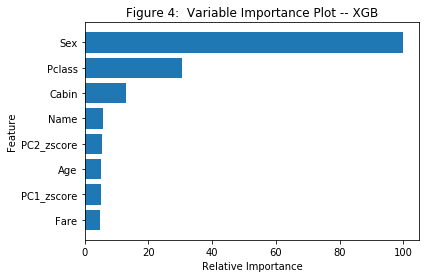

In [46]:
ev_accuracy=[None]*len(models)
ev_name=[None]*len(models)
ev_model=[None]*len(models)
count=0
for name, mdl in models.items():
        ev_accuracy[count],ev_name[count],ev_model[count] = evaluate_model(name,mdl,val_features, val_labels)
        count=count+1
best_name=ev_name[ev_accuracy.index(max(ev_accuracy))]    #picks the maximum accuracy
print('Best Model:',best_name,'with Accuracy of ',max(ev_accuracy))   
best_model=ev_model[ev_accuracy.index(max(ev_accuracy))]    #picks the maximum accuracy

if best_name == 'RF' or best_name == 'GB' or best_name == 'XGB':
    # Get numerical feature importances
    importances = list(best_model.feature_importances_)
    importances=100*(importances/max(importances))
    feature_list = list(features.columns)
    
    sorted_ID=np.argsort(importances)
    def sort_list(list1, list2): 
        zipped_pairs = zip(list2, list1)   
        z = [x for _, x in sorted(zipped_pairs)]       
        return z 
    
    plt.figure()
    plt.barh(sort_list(feature_list,importances),importances[sorted_ID],align='center')
    plt.title('Figure 4:  Variable Importance Plot -- {}'.format(best_name))
    plt.xlabel('Relative Importance')
    plt.ylabel('Feature') 
    plt.savefig('Figure4.png',dpi=300,bbox_inches='tight')
    plt.show()
else:
    print('Best model does not have feature importance')       


All of the models were similar, therefore only the highest accuracy model was chosen.  The variable importance plot shows the feature importance, which is similar to the intensities of the heatmaps previously. 

# 6.3 Machine Learning: Predict with Best Model

#### Function:  predict_model

In [47]:
def predict_model(name, model, features):
    pred = model.predict(features)
    return pred

In [48]:
for name, mdl in models.items():
        y_pred=predict_model(best_name,mdl,pd.DataFrame(test_clean))
y_pred=pd.DataFrame(y_pred)
test=pd.read_csv('/kaggle/input/titanic/test.csv')
#test=os.path.join(currentDirectory,'test.csv')
#test=pd.read_csv(test)
test.head(10) #notice Survival is NOT provided for test dataset
Kaggle_Submission=test
Kaggle_Submission['Survived']=y_pred.astype(int)
Kaggle_Submission=Kaggle_Submission[['PassengerId','Survived']]

# Code Objective 7: Export Results for Kaggle Competition 

In [49]:
Kaggle_Submission_path=os.path.join(currentDirectory,'Kaggle_Submission_Steven_Smiley.csv')
Kaggle_Submission.to_csv(Kaggle_Submission_path,index=False)